In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import re

In [2]:
#open csv file
data = pd.read_csv("movies.csv")
data.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [3]:
#view the shape of our dataset, our dataset has 9999 rows and 9 columns
data.shape

(9999, 9)

In [4]:
#find isnull value in dataset
data.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

We have 6 columns with isnull values. We will applied some tecnics to solve this problem

In [5]:
#We start with year attribute. We print the content of column
data['YEAR'].unique()

array(['(2021)', '(2021– )', '(2010–2022)', '(2013– )', '(2020– )',
       '(2006–2013)', '(2019– )', '(2016–2021)', '(2011– )', '(2005– )',
       '(2008–2013)', '(2017– )', '(2017–2021)', '(2016– )',
       '(1994–2004)', '(2014– )', '(2013–2020)', '(2015– )',
       '(2005–2020)', '(2013–2022)', '(2003– )', '(2009–2020)',
       '(I) (2018– )', '(2010–2015)', '(2011–2019)', '(2015–2020)',
       '(2005–2014)', '(2009–2015)', '(2008–2014)', '(2016–2018)',
       '(2009–2017)', '(2020)', '(2018–2021)', '(2017–2020)',
       '(1987–1994)', '(2018– )', '(2012– )', '(2014–2020)',
       '(2011–2018)', '(2005–2017)', '(2017)', '(2007–2015)',
       '(2000–2007)', '(II) (2007– )', '(1993)', '(1999–2022)',
       '(2015–2018)', '(2014–2019)', '(2016)', '(2012–2020)',
       '(2013–2019)', '(2007–2012)', '(2011–2020)', '(2010–2017)',
       '(2000–2015)', '(2015–2021)', '(2001)', '(1997– )', '(2011–2017)',
       '(1993–1999)', '(1989–1998)', '(2010–2013)', '(2010–2020)',
       '(2003–2019)

In [6]:
def extract_years(year_str):
    if pd.isna(year_str):
        return None, None  # Return None for NaN values
    
    # Removing any leading non-year characters (like Roman numerals or letters) before the years
    clean_str = re.sub(r"^[^(]*", "", year_str)
    
    # Extract years from cleaned string
    years = re.findall(r"\d{4}", clean_str)

    if len(years) == 0:
        return None, None
    elif len(years) == 1:
        return years[0], None if '–' in clean_str else years[0]
    else:
        return years[0], years[-1]

# Apply the function to the dataset
data['Start_Year'], data['End_Year'] = zip(*data['YEAR'].apply(extract_years))
data

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Start_Year,End_Year
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,2021,2021
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,2021,None
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,2010,2022
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,2013,None
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,2021,2021
...,...,...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN,2021,None
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN,2021,None
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN,2022,None
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN,2021,None


In [7]:
#Next we remove year column of dataset
data.drop("YEAR", axis=1, inplace=True)

In [8]:
data.head()

,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Start_Year,End_Year
0,Blood Red Sky,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,2021,2021
1,Masters of the Universe: Revelation,"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,2021,None
2,The Walking Dead,"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,2010,2022
3,Rick and Morty,"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,2013,None
4,Army of Thieves,"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,2021,2021


In [9]:
data.isnull().sum()

MOVIES           0
GENRE           80
RATING        1820
ONE-LINE         0
STARS            0
VOTES         1820
RunTime       2958
Gross         9539
Start_Year     748
End_Year      3928
dtype: int64

In [10]:
# Conversion de la colonne Start_Year et End_Year en entiers
data['Start_Year'] = pd.to_numeric(data['Start_Year'], errors='coerce')
data['End_Year'] = pd.to_numeric(data['End_Year'], errors='coerce')

In [11]:
#we will replace none value by mode
mode_start = data['Start_Year'].mode()[0]
data['Start_Year'].fillna(mode_start, inplace=True)

In [12]:
#we will replace none value by mode
mode_start = data['End_Year'].mode()[0]
data['End_Year'].fillna(mode_start, inplace=True)

In [13]:
data.isnull().sum()

MOVIES           0
GENRE           80
RATING        1820
ONE-LINE         0
STARS            0
VOTES         1820
RunTime       2958
Gross         9539
Start_Year       0
End_Year         0
dtype: int64

In [14]:
#Now we work on Genre column
mode_value = data['GENRE'].mode()[0]
data['GENRE'].fillna(mode_value, inplace=True)

In [15]:
#We replace \n by ""
data[['GENRE', 'ONE-LINE', 'STARS']] = data[['GENRE', 'ONE-LINE', 'STARS']].replace('\n','',regex=True)
data['GENRE']

0           Action, Horror, Thriller            
1       Animation, Action, Adventure            
2            Drama, Horror, Thriller            
3       Animation, Adventure, Comedy            
4              Action, Crime, Horror            
                          ...                   
9994       Adventure, Drama, Fantasy            
9995    Animation, Action, Adventure            
9996              Documentary, Sport            
9997       Adventure, Drama, Fantasy            
9998       Adventure, Drama, Fantasy            
Name: GENRE, Length: 9999, dtype: object

In [16]:
data.isnull().sum()

MOVIES           0
GENRE            0
RATING        1820
ONE-LINE         0
STARS            0
VOTES         1820
RunTime       2958
Gross         9539
Start_Year       0
End_Year         0
dtype: int64

We will used interpolation because values are float and can be predicted. We will used linear interpolation which is the default method. It assumes that the rate of change between the data points is constant. It is simple and often effective for evenly spaced datasets.

In [17]:
#We work on rating column
data['RATING'] = data['RATING'].interpolate(method='linear')
data['RATING']

0       6.1
1       5.0
2       8.2
3       9.2
4       8.4
       ... 
9994    8.8
9995    8.8
9996    8.8
9997    8.8
9998    8.8
Name: RATING, Length: 9999, dtype: float64

In [18]:
#We work now on stars column
# Création d'un DataFrame
df = pd.DataFrame(data)

# Fonction pour extraire le réalisateur
def extract_director(text):
    if 'Director:' in text:
        return text.split('|')[0].replace('Director:', '').strip()
    return None

# Fonction pour extraire les stars
def extract_stars(text):
    if 'Stars:' in text:
        return text.split('|')[-1].replace('Stars:', '').strip()

# Appliquer les fonctions
data['Director'] = data['STARS'].apply(extract_director)
data['STARS'] = data['STARS'].apply(extract_stars)
data

,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Start_Year,End_Year,Director
0,Blood Red Sky,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"Peri Baumeister, Carl Anton Koch, Alexander Sc...","21,062",121.0,NaN,2021.0,2021.0,Peter Thorwarth
1,Masters of the Universe: Revelation,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Chris Wood, Sarah Michelle Gellar, Lena Headey...","17,870",25.0,NaN,2021.0,2020.0,None
2,The Walking Dead,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Andrew Lincoln, Norman Reedus, Melissa McBride...","885,805",44.0,NaN,2010.0,2022.0,None
3,Rick and Morty,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Justin Roiland, Chris Parnell, Spencer Grammer...","414,849",23.0,NaN,2013.0,2020.0,None
4,Army of Thieves,"Action, Crime, Horror",8.4,"A prequel, set before the events of Army of th...","Matthias Schweighöfer, Nathalie Emmanuel, Ruby...",NaN,NaN,NaN,2021.0,2021.0,Matthias Schweighöfer
...,...,...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,"Adventure, Drama, Fantasy",8.8,Add a Plot,"Morgan Taylor Campbell, Chris Cope, Iñaki Godo...",NaN,NaN,NaN,2021.0,2020.0,None
9995,Arcane,"Animation, Action, Adventure",8.8,Add a Plot,None,NaN,NaN,NaN,2021.0,2020.0,None
9996,Heart of Invictus,"Documentary, Sport",8.8,Add a Plot,None,NaN,NaN,NaN,2022.0,2020.0,Orlando von Einsiedel
9997,The Imperfects,"Adventure, Drama, Fantasy",8.8,Add a Plot,"Morgan Taylor Campbell, Iñaki Godoy, Rhianna J...",NaN,NaN,NaN,2021.0,2020.0,Jovanka Vuckovic


In [19]:
data.isnull().sum()

MOVIES           0
GENRE            0
RATING           0
ONE-LINE         0
STARS         1384
VOTES         1820
RunTime       2958
Gross         9539
Start_Year       0
End_Year         0
Director      4643
dtype: int64

In [20]:
data['STARS'].fillna('Unknown stars', inplace=True)
data['Director'].fillna('Unknown directors', inplace=True)

In [21]:
#We work on votes column
#we remove commas in this column and convert it in float
data['VOTES'] = data['VOTES'].str.replace(',',"")
data['VOTES'] = data['VOTES'].astype(float)
data['VOTES']

0        21062.0
1        17870.0
2       885805.0
3       414849.0
4            NaN
          ...   
9994         NaN
9995         NaN
9996         NaN
9997         NaN
9998         NaN
Name: VOTES, Length: 9999, dtype: float64

In [22]:
#now we replace Nan values by mean
mean_value = data['VOTES'].mean()
data['VOTES'].fillna(mean_value, inplace=True)

In [23]:
#We work on runtime
data['RunTime']

0       121.0
1        25.0
2        44.0
3        23.0
4         NaN
        ...  
9994      NaN
9995      NaN
9996      NaN
9997      NaN
9998      NaN
Name: RunTime, Length: 9999, dtype: float64

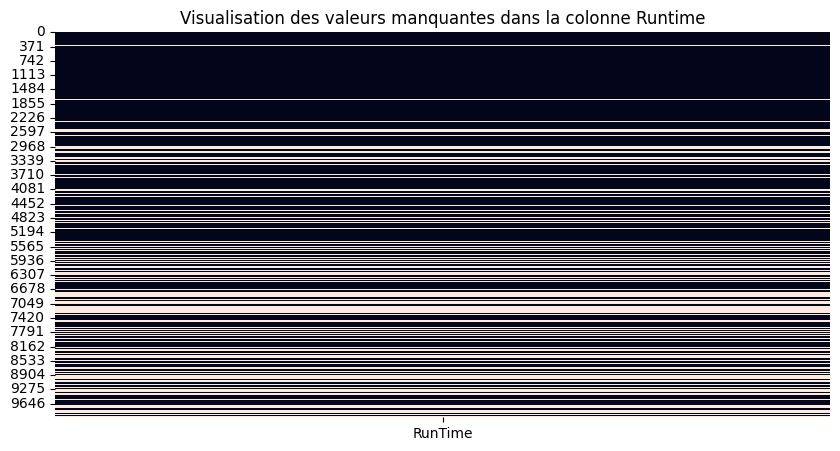

In [24]:
# Création d'un graphique pour visualiser les NaN dans une colonne spécifique, par exemple la colonne 'A'
plt.figure(figsize=(10, 5))
sns.heatmap(data[['RunTime']].isnull(), cbar=False)
plt.title('Visualisation des valeurs manquantes dans la colonne Runtime')
plt.show()

In [25]:
val = data['RunTime'].mean()
data['RunTime'].fillna(val, inplace=True)

In [26]:
data['Gross'].unique()

array([nan, '$75.47M', '$402.45M', '$89.22M', '$315.54M', '$57.01M',
       '$260.00M', '$132.38M', '$167.77M', '$404.52M', '$15.07M',
       '$70.10M', '$210.61M', '$327.48M', '$390.53M', '$303.00M',
       '$56.63M', '$58.06M', '$353.01M', '$46.89M', '$7.00M', '$377.85M',
       '$107.83M', '$403.71M', '$316.83M', '$100.55M', '$28.26M',
       '$188.76M', '$213.52M', '$226.01M', '$408.08M', '$10.06M',
       '$14.84M', '$168.05M', '$183.64M', '$342.55M', '$96.52M',
       '$140.22M', '$172.56M', '$56.95M', '$330.36M', '$17.80M', '$0.20M',
       '$56.82M', '$66.21M', '$75.61M', '$4.56M', '$106.58M', '$5.02M',
       '$22.68M', '$102.92M', '$110.52M', '$504.01M', '$26.86M', '$2.00M',
       '$32.73M', '$33.80M', '$400.74M', '$19.02M', '$36.26M', '$6.67M',
       '$45.51M', '$75.66M', '$0.33M', '$4.00M', '$20.16M', '$95.86M',
       '$176.48M', '$126.66M', '$80.10M', '$42.34M', '$0.04M', '$4.71M',
       '$117.72M', '$229.09M', '$33.70M', '$97.69M', '$21.15M', '$27.85M',
       '$25.02

In [27]:
def convert_currency_to_numbers(data, column_name):
    # Supprime le signe dollar et le suffixe 'M', puis convertit en float et multiplie par un million
    data['Gross'] = data['Gross'].replace('[\$,M]', '', regex=True).astype(float) * 1_000_000
    return data
# Appel de la fonction sur la colonne 'Revenue'
data = convert_currency_to_numbers(data, 'Gross')
data.head()

,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Start_Year,End_Year,Director
0,Blood Red Sky,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",21062.000000,121.000000,NaN,2021.0,2021.0,Peter Thorwarth
1,Masters of the Universe: Revelation,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",17870.000000,25.000000,NaN,2021.0,2020.0,Unknown directors
2,The Walking Dead,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Andrew Lincoln, Norman Reedus, Melissa McBride...",885805.000000,44.000000,NaN,2010.0,2022.0,Unknown directors
3,Rick and Morty,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Justin Roiland, Chris Parnell, Spencer Grammer...",414849.000000,23.000000,NaN,2013.0,2020.0,Unknown directors
4,Army of Thieves,"Action, Crime, Horror",8.4,"A prequel, set before the events of Army of th...","Matthias Schweighöfer, Nathalie Emmanuel, Ruby...",15124.062722,68.688539,NaN,2021.0,2021.0,Matthias Schweighöfer


In [28]:
#This column has more than 90% of values which does not exist. We ise nterpolation to fill it
data['Gross'] = data['Gross'].interpolate(method='linear')

In [29]:
#We fill null value with mean
mean_value=data['Gross'].mean()
data['Gross'].fillna(mean_value, inplace=True)

In [83]:
data.isnull().sum()

MOVIES        0
GENRE         0
RATING        0
STARS         0
VOTES         0
RunTime       0
Gross         0
Start_Year    0
End_Year      0
Director      0
dtype: int64

In [31]:
data.duplicated().sum()

25

In [32]:
data = data.drop_duplicates()

In [33]:
data.duplicated().sum()

0

# Data visualization

In [36]:
data.head()

,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Start_Year,End_Year,Director
0,Blood Red Sky,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",21062.000000,121.000000,1.067917e+07,2021.0,2021.0,Peter Thorwarth
1,Masters of the Universe: Revelation,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",17870.000000,25.000000,1.067917e+07,2021.0,2020.0,Unknown directors
2,The Walking Dead,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Andrew Lincoln, Norman Reedus, Melissa McBride...",885805.000000,44.000000,1.067917e+07,2010.0,2022.0,Unknown directors
3,Rick and Morty,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Justin Roiland, Chris Parnell, Spencer Grammer...",414849.000000,23.000000,1.067917e+07,2013.0,2020.0,Unknown directors
4,Army of Thieves,"Action, Crime, Horror",8.4,"A prequel, set before the events of Army of th...","Matthias Schweighöfer, Nathalie Emmanuel, Ruby...",15124.062722,68.688539,1.067917e+07,2021.0,2021.0,Matthias Schweighöfer


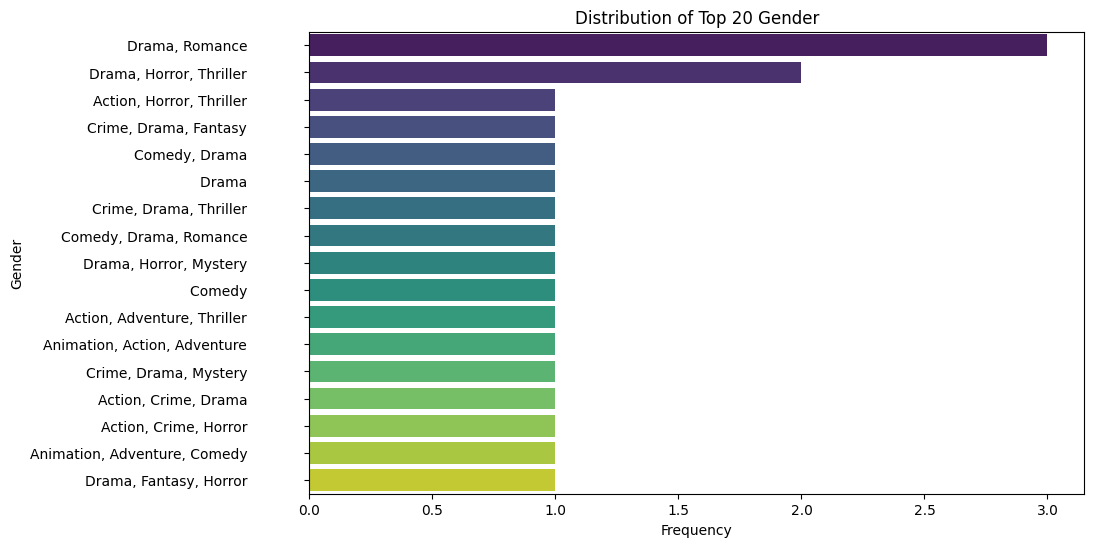

In [35]:
# Sélectionner les 20 premières valeurs de la colonne 'GENRE'
top_20_gender = data['GENRE'].head(20)

# Calculer le nombre d'occurrences pour chaque titre de poste unique
gender_counts = top_20_gender.value_counts()

# Création du graphique à barres
plt.figure(figsize=(10, 6))  # Taille du graphique
sns.barplot(x=gender_counts.values, y=gender_counts.index, palette='viridis')  # Créer un graphique à barres avec seaborn
plt.xlabel('Frequency')  # Ajouter une étiquette à l'axe des x
plt.ylabel('Gender')  # Ajouter une étiquette à l'axe des y
plt.title('Distribution of Top 20 Gender')  # Ajouter un titre
plt.show()  # Afficher le graphique

# data preparation

In [39]:
data.columns

Index(['MOVIES', 'GENRE', 'RATING', 'STARS', 'VOTES', 'RunTime', 'Gross',
       'Start_Year', 'End_Year', 'Director'],
      dtype='object')

In [46]:
#We prepare dataset
from sklearn.preprocessing import LabelEncoder
# Initialisation des encodeurs et des dictionnaires pour chaque colonne
columns_to_encode = ['MOVIES', 'GENRE', 'STARS', 'Director']
encoders = {col: LabelEncoder() for col in columns_to_encode}
label_mapping = {}

# Application de LabelEncoder à chaque colonne et stockage du mappage
for col in columns_to_encode:
    data[col] = encoders[col].fit_transform(data[col])
    label_mapping[col] = {index: label for index, label in enumerate(encoders[col].classes_)}

/tmp/ipykernel_2337/1741369568.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = encoders[col].fit_transform(data[col])
/tmp/ipykernel_2337/1741369568.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = encoders[col].fit_transform(data[col])
/tmp/ipykernel_2337/1741369568.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [47]:
# Afficher le dictionnaire de mappage pour chaque colonne
for col, mapping in label_mapping.items():
    print(f"Mapping for {col}: {mapping}")

Mapping for MOVIES: {0: ' 13 Reasons Why', 1: ' 1899', 2: ' 3Below: Tales of Arcadia', 3: ' 50M2', 4: ' 7Seeds', 5: ' 800 metros', 6: ' A Suitable Boy', 7: ' Ada Twist, Scientist', 8: ' After Life', 9: ' Age of Samurai: Battle for Japan', 10: ' AlRawabi School for Girls', 11: ' Alex', 12: ' Alguien tiene que morir', 13: ' Alice in Borderland', 14: ' Alta mar', 15: ' American Experience', 16: ' American Masters', 17: ' Anatomy of a Scandal', 18: ' Angry Birds: Summer Madness', 19: ' Anne', 20: ' Arcane', 21: ' Archive 81', 22: ' Army of the Dead: Lost Vegas', 23: ' Aseudal Yeondaegi', 24: ' Ask 101', 25: ' Astronomy Club', 26: ' Astérix', 27: ' Avatar: The Last Airbender', 28: ' Baahubali: Before the Beginning', 29: ' Baby', 30: ' Baki', 31: ' Bangkok Breaking', 32: ' Barbarians', 33: ' Battle Kitty', 34: ' Beastars', 35: ' Bee and PuppyCat', 36: ' Behind Her Eyes', 37: ' Ben X Jim', 38: ' Big Mouth', 39: ' Bir Baskadir', 40: ' Bir Denizalti Hikayesi', 41: ' Black Lightning', 42: ' Blac

In [48]:
data.head()

,MOVIES,GENRE,RATING,STARS,VOTES,RunTime,Gross,Start_Year,End_Year,Director
0,1139,60,6.1,4876,21062.000000,121.000000,1.067917e+07,2021.0,2021.0,2355
1,3719,112,5.0,1151,17870.000000,25.000000,1.067917e+07,2021.0,2020.0,3014
2,6022,387,8.2,402,885805.000000,44.000000,1.067917e+07,2010.0,2022.0,3014
3,4621,123,9.2,3270,414849.000000,23.000000,1.067917e+07,2013.0,2020.0,3014
4,836,31,8.4,4196,15124.062722,68.688539,1.067917e+07,2021.0,2021.0,1981


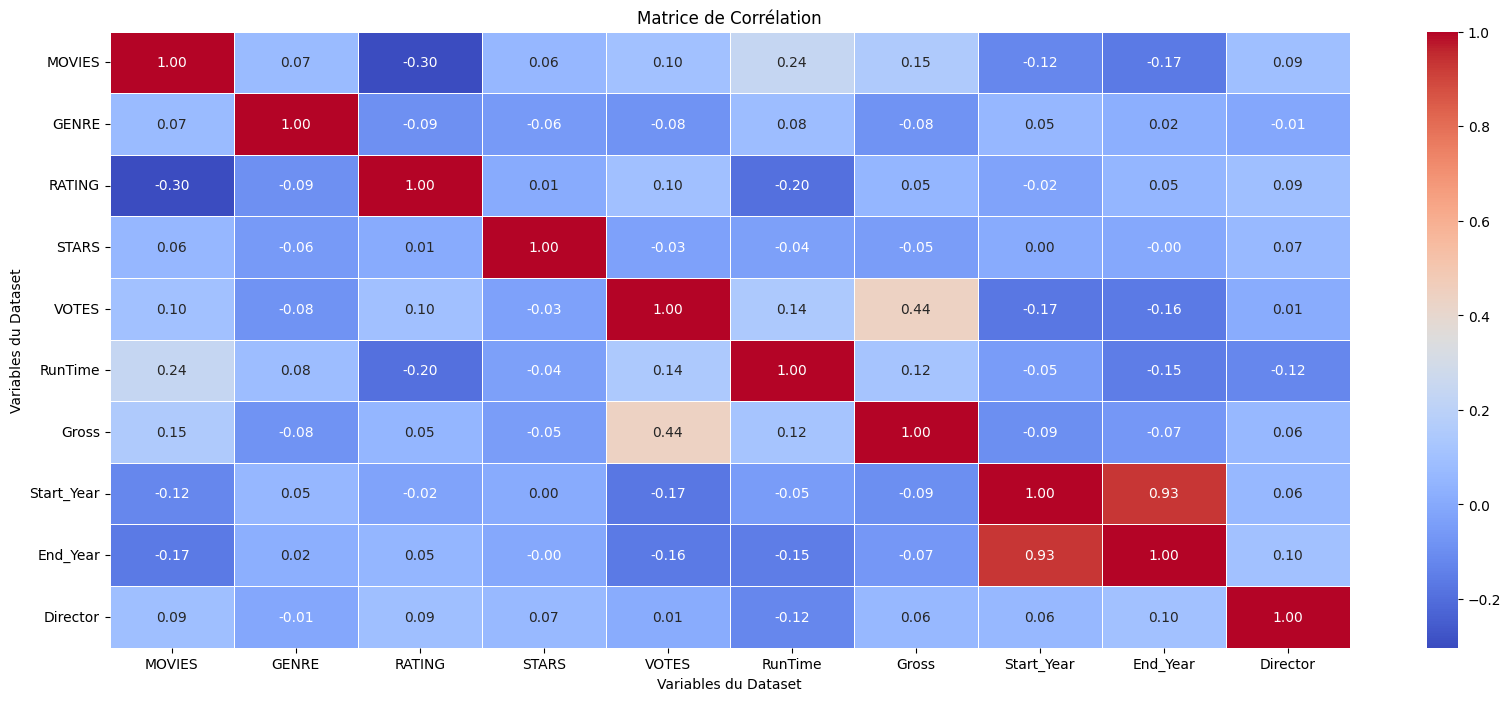

In [49]:
corr=data.corr()
# Configuration de la taille de la figure
plt.figure(figsize=(20, 8))

# Création de la heatmap de la matrice de corrélation
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=.5)

# Ajout du titre et des labels
plt.title('Matrice de Corrélation')
plt.xlabel('Variables du Dataset')
plt.ylabel('Variables du Dataset')

# Affichage du graphique
plt.show()

# Divide dataset into train and test

In [104]:
from sklearn.model_selection import train_test_split

# X will contain all columns except'VOTES'
X = data.drop('VOTES', axis=1)
# y will only contain the column 'VOTES'
y = data['VOTES']
# we divide dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Training set size:", y_train.shape)
print("Test set size:", y_test.shape)

Training set size: (7979, 9)
Test set size: (1995, 9)
Training set size: (7979,)
Test set size: (1995,)


In [105]:
X.isnull().sum()

MOVIES        0
GENRE         0
RATING        0
STARS         0
RunTime       0
Gross         0
Start_Year    0
End_Year      0
Director      0
dtype: int64

# Training model

In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
#create one instance of model
model = LinearRegression()

In [114]:
#train model
model.fit(X_train, y_train)

LinearRegression()

In [115]:
#evaluate model
from sklearn.metrics import mean_squared_error, r2_score

# Prédire les valeurs pour l'ensemble de test
y_pred = model.predict(X_test)

# Calculer les métriques
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)

MSE: 2455096634.7085285
R²: 0.1455880754565686


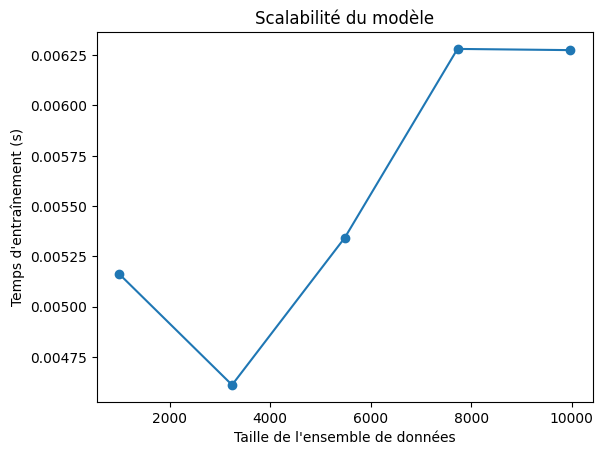

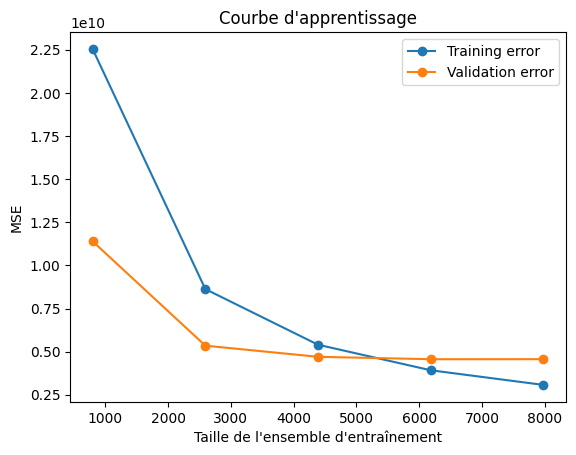

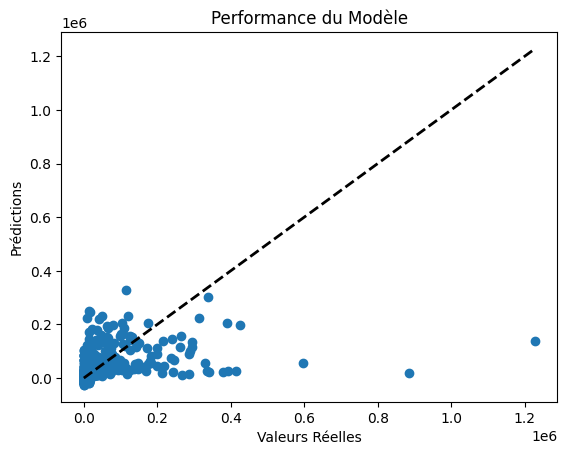

In [116]:
from sklearn.metrics import mean_squared_error
from time import time

# Fonction pour calculer le temps d'entraînement et le temps de prédiction
def plot_scalability(model, X, y):
    train_sizes = np.linspace(0.1, 1.0, 5)
    times = []
    for size in train_sizes:
        subset_X, subset_y = X[:int(size * len(X))], y[:int(size * len(y))]
        start_time = time()
        model.fit(subset_X, subset_y)
        times.append(time() - start_time)
    plt.plot(train_sizes * len(X), times, 'o-')
    plt.title('Scalabilité du modèle')
    plt.xlabel('Taille de l\'ensemble de données')
    plt.ylabel('Temps d\'entraînement (s)')
    plt.show()

# Fonction pour afficher les courbes d'apprentissage
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, scoring='neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis=1)
    validation_scores_mean = -validation_scores.mean(axis=1)
    
    plt.plot(train_sizes, train_scores_mean, 'o-', label='Training error')
    plt.plot(train_sizes, validation_scores_mean, 'o-', label='Validation error')
    plt.title('Courbe d\'apprentissage')
    plt.xlabel('Taille de l\'ensemble d\'entraînement')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

# Fonction pour visualiser les prédictions
def plot_predictions(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Valeurs Réelles')
    plt.ylabel('Prédictions')
    plt.title('Performance du Modèle')
    plt.show()

# Exécution des fonctions
plot_scalability(model, X, y)
plot_learning_curve(model, X, y)
plot_predictions(model, X_train, y_train, X_test, y_test)

In [120]:
def plot_training(train_sizes, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, fit_times_mean, fit_times_std, title, ylim=(0.7, 1.01)):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns
    
    # Courbe d'apprentissage
    axs[0].grid()
    axs[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                        train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axs[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                        test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axs[0].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axs[0].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation score")
    axs[0].set_title("Courbe d'apprentissage")
    axs[0].set_xlabel("Taille de l'ensemble d'entraînement")
    axs[0].set_ylabel("Score")
    axs[0].legend(loc="best")
    axs[0].set_ylim(ylim)

    # Performance du modèle (temps d'entraînement)
    axs[1].grid()
    axs[1].plot(train_sizes, fit_times_mean, 'o-')
    axs[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                        fit_times_mean + fit_times_std, alpha=0.1)
    axs[1].set_title("Performance du modèle (temps d'entraînement)")
    axs[1].set_xlabel("Taille de l'ensemble d'entraînement")
    axs[1].set_ylabel("Temps moyen d'entraînement (secondes)")
    
    # Titre général
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajuster la mise en page pour faire de la place pour le titre
    plt.show()

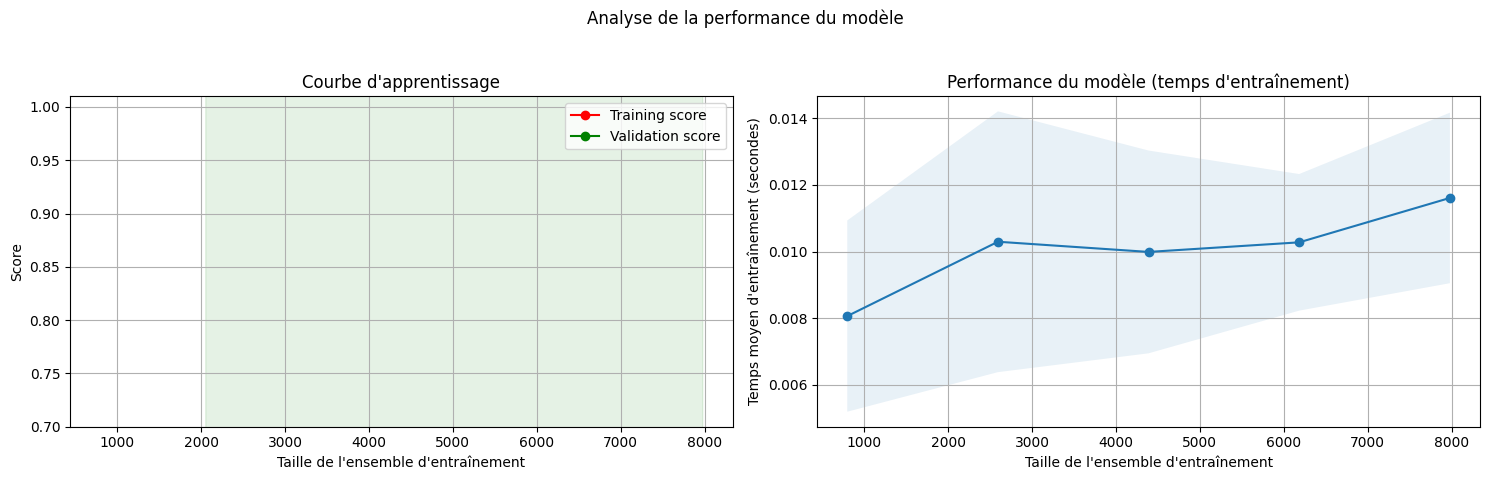

In [121]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

# Configuration de la learning curve
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    model, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5,
    scoring='neg_mean_squared_error', return_times=True)

# Calcul des moyennes et des écarts types des scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Calcul des moyennes et des écarts types des temps de fit
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Maintenant vous pouvez appeler la fonction plot_training
plot_training(train_sizes, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, fit_times_mean, fit_times_std, 'Analyse de la performance du modèle')

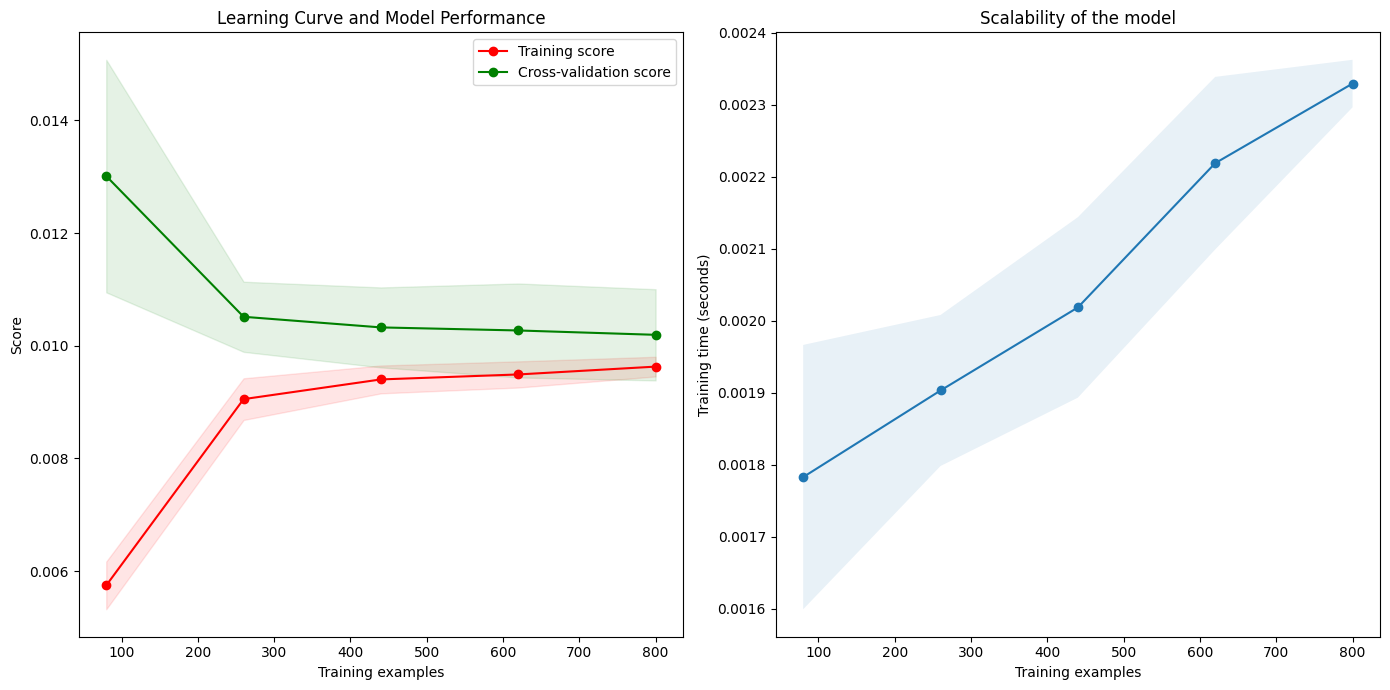

In [122]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Générer des données de régression synthétiques comme exemple
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1)

# Créer une instance du modèle
model = LinearRegression()

# Configuration de la learning curve
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    model, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5,
    scoring='neg_mean_squared_error', return_times=True)

# Calcul des moyennes et des écarts types des scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Calcul des moyennes et des écarts types des temps de fit
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Fonction pour tracer les résultats
def plot_training(train_sizes, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, fit_times_mean, fit_times_std, title):
    plt.figure(figsize=(14, 7))
    plt.subplot(121)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")

    plt.subplot(122)
    plt.plot(train_sizes, fit_times_mean, 'o-')
    plt.fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.1)
    plt.title("Scalability of the model")
    plt.xlabel("Training examples")
    plt.ylabel("Training time (seconds)")

    plt.tight_layout()
    plt.show()

# Appeler la fonction d'affichage
plot_training(train_sizes, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, fit_times_mean, fit_times_std, 'Learning Curve and Model Performance')

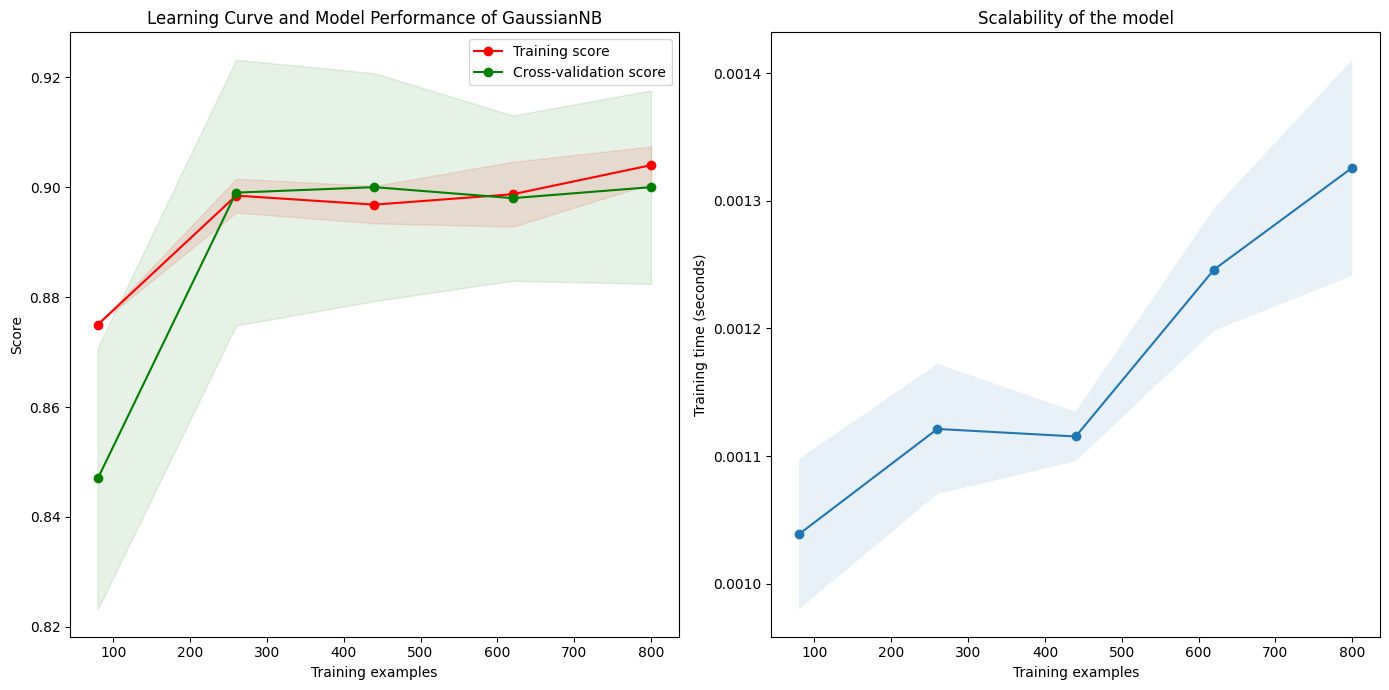

In [123]:
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Générer des données de classification synthétiques comme exemple
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Créer une instance du modèle Gaussian Naive Bayes
model = GaussianNB()

# Configuration de la learning curve
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    model, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5,
    scoring='accuracy', return_times=True)

# Calcul des moyennes et des écarts types des scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Calcul des moyennes et des écarts types des temps de fit
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Fonction pour tracer les résultats
def plot_training(train_sizes, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, fit_times_mean, fit_times_std, title):
    plt.figure(figsize=(14, 7))
    plt.subplot(121)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")

    plt.subplot(122)
    plt.plot(train_sizes, fit_times_mean, 'o-')
    plt.fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.1)
    plt.title("Scalability of the model")
    plt.xlabel("Training examples")
    plt.ylabel("Training time (seconds)")

    plt.tight_layout()
    plt.show()

# Appeler la fonction d'affichage
plot_training(train_sizes, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, fit_times_mean, fit_times_std, 'Learning Curve and Model Performance of GaussianNB')